In [1]:
import numpy as np #package for number operation
import pandas as pd #datframe to store table values
import math
import matplotlib.pyplot as plt #library for plots
# below: magic function to draw plots - just use it
%matplotlib inline 

In [2]:
#Import of files
import os #Libraries for file reading
import glob
from pathlib import Path
path = r'C:\Users\Jessie Hu\OneDrive - Imperial College London\PROJECT BSAMA SHARED\BSAMA_HSAMA\HSAMA_Tensile\bien samples\\' #Change directory, keep the \\ at the end
extension = 'txt' #define the filetype of interest
os.chdir(path) #change directory to the directory of interest
file_list = glob.glob('*.{}'.format(extension)) #get all files in the list with given extension

In [3]:
print(file_list)
hysteresis = np.zeros((len(file_list),5)) #create a placeholder array with zeros to store the results in

['1.txt', '2.txt', '3.txt']


In [4]:
from matplotlib import cm
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from numpy import trapz

In [5]:
def dataCleanup(df):
    grip_zero = 40 #zeroed with a gap of 40mm
    df['Load']=pd.to_numeric(df['Fz, gf'])*0.00980665 #convert the str series into numeric values, also gram force to newtons
    df['Pos']=pd.to_numeric(df['Position (z), mm']) #convert the str series into numeric values
    #xarea = (diameter/2)**2*math.pi #[mm2],x-sectional area of sample
    df['Disp'] = -(df['Pos'] - df['Pos'].iloc[0])
    height = grip_zero - df['Pos'].iloc[0]
    df['Load Norm'] =-( df['Load'] - df['Load'].iloc[0])
    df['stress']=df['Load Norm']/4 *10**6 #[Pa]
    df['strain']=df['Disp']/height*100 #%
    df = df[df['stress']>=0] #remove negative stress value rows
    df = df.reset_index(drop=True)
    
    filepath = Path('clean_csv/'+file_list[filenum]+'.csv')  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath,index = False) #Saves the cleaned-up dataframe, used for debugging
    return df

In [6]:
def elasticModuli(df,i,j):
#    fig= plt.figure(figsize=(5,5),dpi=50)
#    ax = fig.add_axes([0,0,1,1])
    ax[i,j].grid(True,which='major', axis='y')
    linearRange = 20 # Upper bound of strain where graph is still linear

    indexLinear = df['strain'][1:len(df.index)//2][df['strain']<=linearRange].idxmax()
    color = cm.Blues(np.linspace(.4, .8, indexLinear))
    x=df["strain"][0: indexLinear].values.reshape((-1, 1))
    y=df["stress"][0: indexLinear]
    model = LinearRegression(fit_intercept=False).fit(x, y)
    r_sq = model.score(x, y)
    ax[i,j].scatter(x,y,color=color)

    # print('coefficient of determination:', r_sq)
    # print('intercept:', model.intercept_)
    # print('slope:', model.coef_*100/1000)
    E = model.coef_/10
    ax[i,j].set_ylim([0, 10000])
    ax[i,j].plot(np.linspace(0,linearRange,200), np.linspace(0,linearRange,200)*model.coef_, '-r')
    ax[i,j].set_title(str(file[0:15]))
    ax[i,j].legend(['R2: '+'%.3f' % model.score(x,y),'E: '+ '%.3f' %E + 'kPa'])

    return E[0]

file name 	 index number 	 max stress 		 Max strain(%) 	 Initial height(mm) 	 Toughness(J/m3) 	 E(kPa)
1.txt 	 0 	 5571.8124588875 	 146.20675335461598 	 19.2645 	 4194.4663234019645	3.544474526155043


C:\Users\Jessie Hu\AppData\Local\Temp\ipykernel_37280\4056867458.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[i,j].legend(['R2: '+'%.3f' % model.score(x,y),'E: '+ '%.3f' %E + 'kPa'])


2.txt 	 0 	 4360.548987462499 	 78.55151397263826 	 23.1345 	 1702.1709989584274	4.969256352661535


C:\Users\Jessie Hu\AppData\Local\Temp\ipykernel_37280\4056867458.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[i,j].legend(['R2: '+'%.3f' % model.score(x,y),'E: '+ '%.3f' %E + 'kPa'])


3.txt 	 0 	 15690.007471075001 	 216.4252932177461 	 19.61 	 17763.777724567168	7.199000590395268


C:\Users\Jessie Hu\AppData\Local\Temp\ipykernel_37280\4056867458.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[i,j].legend(['R2: '+'%.3f' % model.score(x,y),'E: '+ '%.3f' %E + 'kPa'])


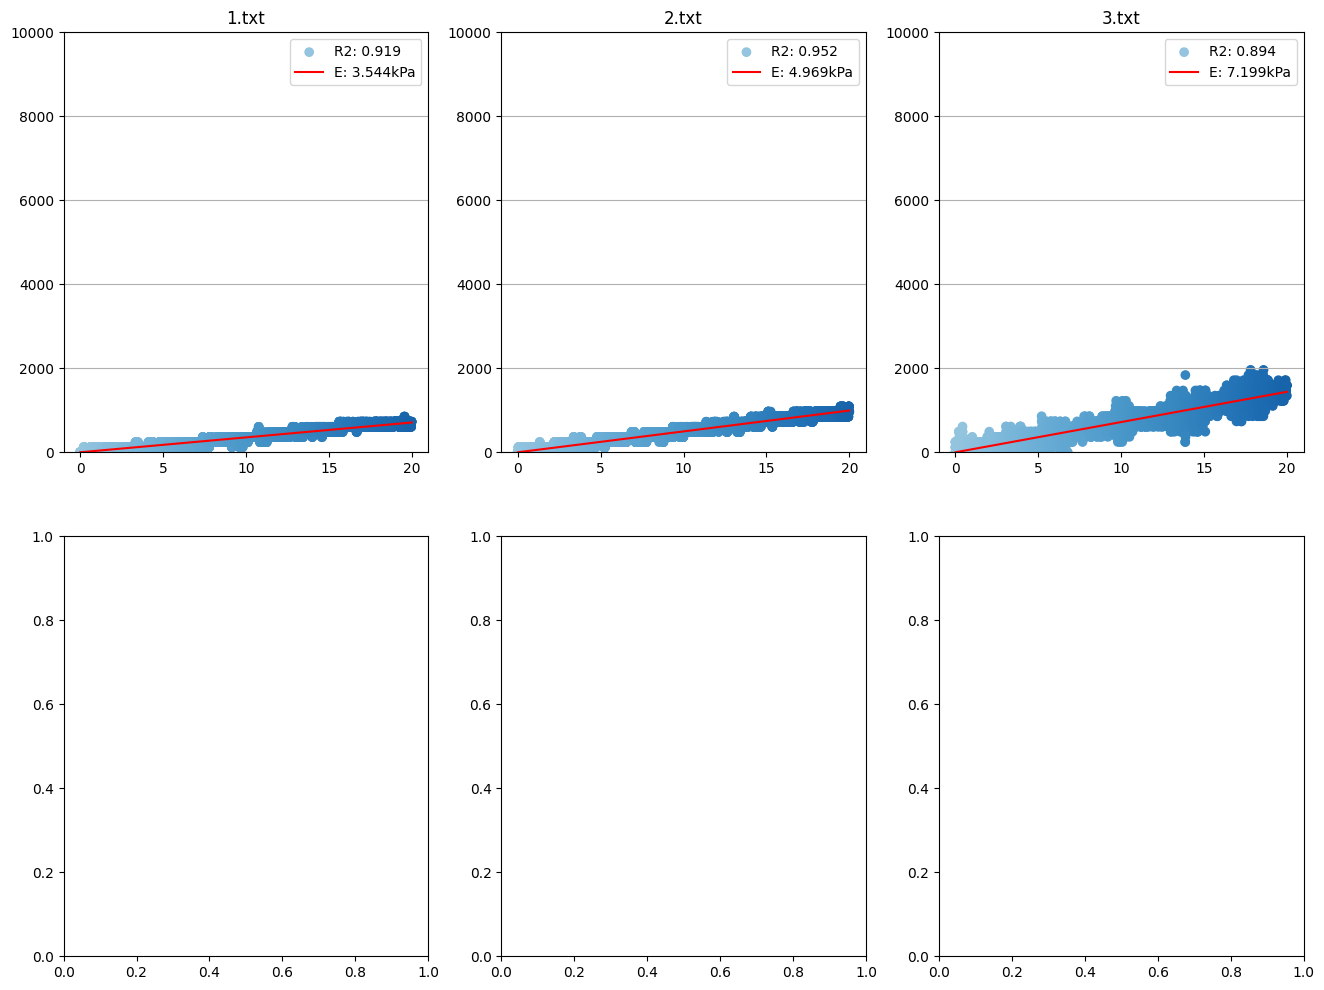

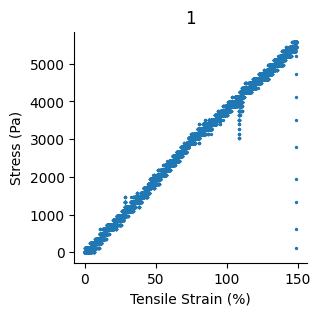

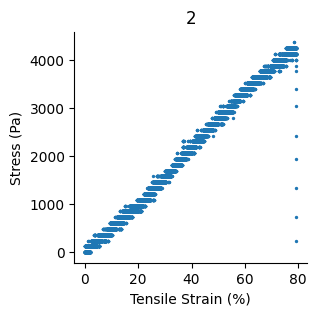

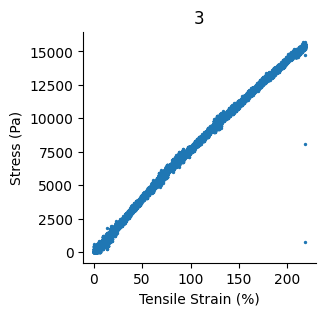

In [8]:
print('file name','\t','index number','\t', 'max stress','\t\t', 'Max strain(%)','\t','Initial height(mm)','\t','Toughness(J/m3)','\t','E(kPa)')
fig, ax = plt.subplots(2, 3,figsize=(16,12),dpi=100)
for filenum,file in enumerate(file_list):
    start,end = [],[]
    with open(file, 'r') as inFile:

        # Read the text file in as a list of lines using .readlines()
        allLines = inFile.readlines()
        allLines = [x.strip('\n') for x in allLines]
        for lineNo,line in enumerate(allLines):
            if line.find('<DATA>') != -1:
                start.append(lineNo)
            elif line.find('<END DATA>') != -1:
                end.append(lineNo)
    
    for i,j in enumerate(start):
        
        df = pd.DataFrame(subs.split('\t') for subs in allLines[start[i]+1:end[i]])
        new_header = df.iloc[0] #grab the first row for the header
        df = df[1:] #take the data less the header row
        df.columns = new_header.str.strip() #set the header row as the df header

        df.to_csv(file_list[filenum]+str(i)+'.csv')
        df=dataCleanup(df)
        max_idx = df['stress'].idxmax()
        max_stress = df['stress'].iloc[max_idx]
        max_strain = df['strain'].iloc[max_idx]
        ini_height = 40 - df['Pos'].iloc[0]

        print(file,'\t',i,'\t', max_stress,'\t', max_strain,'\t',ini_height,'\t',np.trapz(df['stress'],df['strain']/100),end='\t')
        fig2, ax2 = plt.subplots(figsize=(3,3),dpi=100)
        #fig= plt.figure()
        #ax = fig.add_axes([0,0,1,1])
        color = ['#c0c000','#ff6000','#990000','#8d8dff','#0000ff','#000084']
        
        plt.scatter(df['strain'],df['stress'],s=2)

#         plt.rcParams["font.family"] = "sans-serif"
#         plt.rcParams["font.sans-serif"]='Helvetica' 
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)    
        plt.ylabel("Stress (Pa)")
        plt.xlabel("Tensile Strain (%)")
        plt.title(Path(file).stem)

#         plt.savefig(Path(path+file+'.png')) #.stem just gets rid of original file extension

    i = filenum//3
    j = filenum%3 
    print(elasticModuli(df,i,j))
    
    

In [9]:
df.columns

Index(['Time, s', 'Position (z), mm', 'Position (x), mm', 'Position (y), mm',
       'Fz, gf', 'Load', 'Pos', 'Disp', 'Load Norm', 'stress', 'strain'],
      dtype='object', name=0)

In [10]:
dataCleanup(df)

,"Time, s","Position (z), mm","Position (x), mm","Position (y), mm","Fz, gf",Load,Pos,Disp,Load Norm,stress,strain
0,0.000000,19.011000,0.000000,0.000000,-0.246661,-0.002419,19.0110,-0.0000,-0.000000,-0.000000,-0.000000
1,0.010000,19.011000,0.000000,0.000000,-0.246661,-0.002419,19.0110,-0.0000,-0.000000,-0.000000,-0.000000
2,0.020000,19.011000,0.000000,0.000000,-0.246661,-0.002419,19.0110,-0.0000,-0.000000,-0.000000,-0.000000
3,0.030000,19.011000,0.000000,0.000000,-0.246661,-0.002419,19.0110,-0.0000,-0.000000,-0.000000,-0.000000
4,0.040000,19.011000,0.000000,0.000000,-0.246661,-0.002419,19.0110,-0.0000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
26071,261.480000,1.633500,0.000000,0.000000,-2.121282,-0.020803,1.6335,17.3775,0.018384,4595.938007,82.793368
26072,261.490000,1.633000,0.000000,0.000000,-1.627961,-0.015965,1.6330,17.3780,0.013546,3386.481411,82.795750
26073,261.500000,1.632500,0.000000,0.000000,-1.134639,-0.011127,1.6325,17.3785,0.008708,2177.022363,82.798132
26074,261.510000,1.631500,0.000000,0.000000,-0.690650,-0.006773,1.6315,17.3795,0.004354,1088.511182,82.802897
